In [1]:
import numpy as np
import pybullet
import scipy
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from mpl_toolkits.mplot3d import Axes3D

CatBot Lab Context: This notebook supports the CatBot course and focuses on Capture points.

# Capture points

Consider a inverted pendulum which ankle is located at position $\mathbf{r}_{ankle}$ and the center of mass $m$ is located at a position $\mathbf{r}$. The mass $m$ is situated at the end of a telescoping massless mechanism (representing the leg), which is in contact with the flat ground. 

The system is modeled as:

\begin{equation}
m\ddot{\mathbf{r}} = \mathbf{f} + m\mathbf{g}
\end{equation}

where $\mathbf{f} = (f_x, f_y, f_z)^{T}$ is the torque of the actuator that supports the mass $m$ in the air. The ankle is defined as the fixed point in the ground,  $\mathbf{r}_{ankle} = (x_{ankle}, y_{ankle}, 0)^T$. The system has a 

(0, 1)

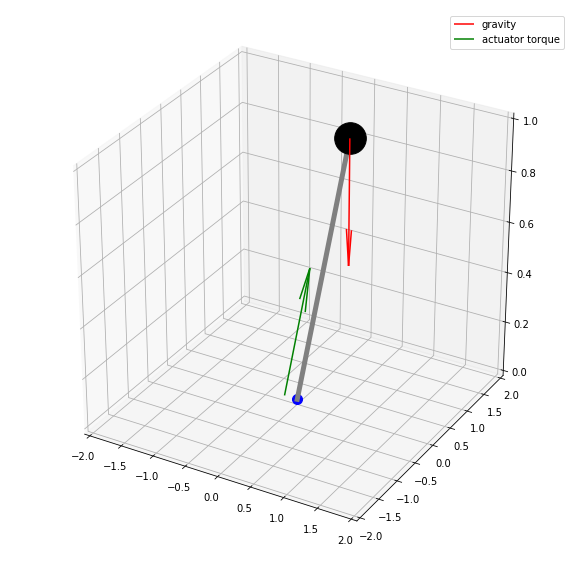

In [2]:
def plotLine3D(axis, pos1, pos2, color = 'black', linewidth = 1, zorder = 0):
    axis.plot([pos1[0], pos2[0]], [pos1[1], pos2[1]], [pos1[2], pos2[2]], color=color, linewidth = linewidth, zorder=zorder)
    
def plotPoint3D(axis, pos, s = 1, color = 'black', label = ''):
    axis.scatter(pos[0], pos[1], pos[2], s = s, color = color, label=label)

def plotVector3D(axis, vector_origin, vector, color='black', scale = 1, label = ''):
    axis.quiver3D(vector_origin[0], vector_origin[1], vector_origin[2],
               scale*vector[0], scale*vector[1], scale*vector[2], color = color, label = label)
    
z0 = 1
x0 = 0.5
y0 = 0.5

r = np.array([x0,y0,z0])
r_ankle = np.array([0,0,0])

g = np.array([0,0,-9.8])
f = r - r_ankle

fig = plt.figure(figsize = (10,10))

axis = fig.gca(projection='3d')
plotLine3D(axis, r_ankle, r, linewidth = 5, color = "grey")
plotPoint3D(axis, r_ankle, color = 'blue', s = 100)

plotPoint3D(axis, r, color = 'black', s = 1000, label ='')
plotVector3D(axis, r, g, color = 'red', scale = 0.05, label = 'gravity')
plotVector3D(axis, r_ankle + np.array([-0.2,0,0]), f, color = 'green', scale = 0.5, label = 'actuator torque')

plt.legend()
axis.set_xlim(-2,2)
axis.set_ylim(-2,2)
axis.set_zlim(0,1)


Since the actuator torque is acting in the leg direction we have that:

\begin{equation}
-(\mathbf{r} - \mathbf{r}_{ankle}) \times \mathbf{f} = 0
\end{equation}

If $\dot{z} = 0$ initially, the point mass will stay at $z = z_0$ if
$\ddot{z} = 0$. Using Equation (2), we find $f_z = mg$. This can be
substituted as:


\begin{equation}
\begin{vmatrix}
\mathbf{i} & \mathbf{j} & \mathbf{k} \\
-(x - x_{ankle}) & -(y - y_{ankle}) & -(z - z_{ankle}) \\
f_x & f_y & mg
\end{vmatrix} = \mathbf{i}(-(y-y_{ankle})mg + (z-z_{ankle})f_y) + ... = 0
\end{equation}

Since we know that $z_{ankle} = 0$ and $z = z_0$, we can obtain:

\begin{equation}
(y - y_{ankle})mg = z_0f_y
\end{equation}

Therefore the solutions for $f_x$ and $f_y$ are:

\begin{equation}
\begin{cases}
f_x = m \omega_0^2 (x - x_{ankle})\\
f_y = m \omega_0^2 (y - y_{ankle})
\end{cases}
\end{equation}

were $\omega_0 = \sqrt{g/z_0}$. Now the equation of motion 

\begin{equation}
    m\ddot{\mathbf{r}} = \mathbf{f} + m\mathbf{g}
\end{equation}

can be written as:

\begin{equation}
    \ddot{\mathbf{r}} = \omega_0^2\mathbf{P}\mathbf{r} - \mathbf{r}_{ankle}
\end{equation}

where 

\begin{equation}
\mathbf{P} = \begin{vmatrix}
1 & 0 & 0 \\
0 & 1 & 0 \\
0 & 0 & 0
\end{vmatrix} 
\end{equation}

projects $\mathbf{r}$ onto the ground

# Instantaneous capture point

For the 3D LIPM with point foot, the instantaneous capture point is the point on the ground that enables the system to come to a stop if it were to instantaneously place and maintain its point foot there. The location of the instantaneous capture point can be computed from energy considerations. For a given constant
foot position, we can interpret the first two rows of equation:

\begin{equation}
    \ddot{\mathbf{r}} = \omega_0^2\mathbf{P}\mathbf{r} - \mathbf{r}_{ankle}
\end{equation}


as the descriptions of two decoupled mass–spring systems.$E_x$ and $E_y$ are then defined as the
Hamiltonians of these systems:

\begin{equation}
\begin{cases}
E_x = \frac{1}{2} \frac{1}{\omega_0^2 z_0^2} \dot{x}^2 - \frac{1}{2} \frac{1}{z_0^2}(x - x_{ankle})^2 \\
E_y = \frac{1}{2} \frac{1}{\omega_0^2 z_0^2} \dot{y}^2 - \frac{1}{2} \frac{1}{z_0^2}(y - y_{ankle})^2 \\
\end{cases}
\end{equation}

The Hamiltonian, also called the Orbital energy, determines the behavior
of the 3D-LIPM in a direction when the CoM is moving toward the foot. Considering the $x$-direction for example,
three cases of interest arise:



   1) $E_x$ > 0. The orbital energy is sufficient to let $x$	reach
$x_{ankle}$, after which x continues to accelerate away from $x_{ankle}$

   2) $E_x < 0$, $x$ reverses direction before x reaches $x_{ankle}$
    
   3) $E_x = 0$. $x$ comes to a rest exactly at $x_{ankle}$.


We can solve for a foot location that results in either desired orbital energies or, equivalently, a desired velocity vector at a given value of r (Kajita and Tanie 1991; Kajita
et al. 2001). To determine the instantaneous capture point, we are interested in the foot placement required to obtain zero orbital energy in each direction. Solving the previous equation for orbital energy:

\begin{equation}
\frac{1}{2} \frac{1}{\omega_0^2 z_0^2} \dot{x}^2 - \frac{1}{2} \frac{1}{z_0^2}(x - x_{ic})^2  = 0 \quad \longrightarrow \quad (x - x_{ic})^2 = \frac{\dot{x}^2}{\omega_0^2}
\end{equation}

then:

\begin{equation}
x_{ic} = x + \frac{\dot{x}}{\omega_0}
\end{equation}

And in vectorial notation:

\begin{equation}
\mathbf{r}_{ic} = \mathbf{P}\mathbf{r} + \frac{\dot{\mathbf{r}}}{\omega_0}
\end{equation}

0.61943828249997


(-0.1, 1.1)

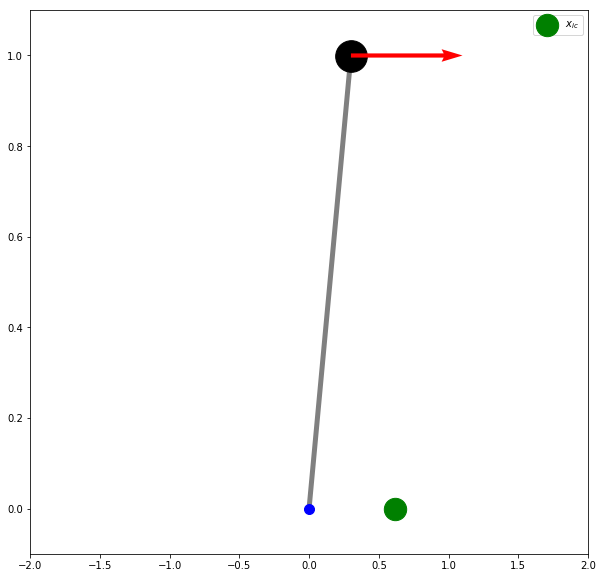

In [5]:
fig, axis = plt.subplots(figsize = (10,10))
z0 = 1
g = 9.8

omega0 = np.sqrt(g/z0)


x_ankle = 0
z_ankle = 0

dxdt = 1
dzdt = 0

z  = z0
x = 0.3

x_ic = x + dxdt/omega0
print(x_ic)




plt.plot([x_ankle, x], [z_ankle, z], color = 'grey', linewidth = 5, zorder = 0)
plt.scatter(x, z, color='black', s = 1000)
plt.scatter(x_ankle, z_ankle, color='blue', s = 100)
plt.quiver(x, z, dxdt, dzdt, color = 'red', scale= 5)
plt.scatter(x_ic, 0, color = 'green', s = 500, label = '$x_{ic}$')
plt.legend()
axis.set_xlim(-2,2)
axis.set_ylim(-0.1,1.1)

Based on [3]. Good explanation [4] for capture point. [5] is very good for force controlled robot, better explained than the one for Cheeta


__[3] Capture point: A
step toward humanoid push recovery__

__[4] Capturability-based analysis and control of legged locomotion, Part 1: Theory and application to three simple gait models__

__[5] High-slope Terrain Locomotion for Torque-Controlled Quadruped Robots__ 